<a href="https://colab.research.google.com/github/nrzsdy1993/Deeplearning_Basic/blob/main/6_fashionMNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
---

## 1. 데이터 불러오기

In [14]:
#MNIST tensorflow.keras
from tensorflow.keras import datasets
import numpy as np
import tensorflow as tf


In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## 2. 데이터 시각화 (EDA)

In [16]:
import matplotlib.pyplot as plt

* 이미지 확인

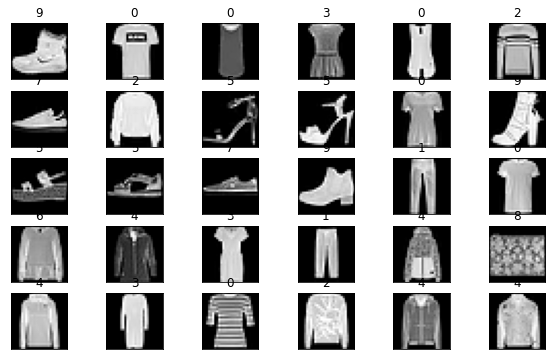

In [17]:
plt.figure(figsize=(10,6))         #이미지 사이즈 조절
for i in range(30):
  plt.subplot(5,6,i+1)
  img=x_train[i]
  label = y_train[i]
  plt.imshow(img, cmap ='gray')      #회색으로 변환
  plt.title(label)
  plt.xticks([])            #중간에 숫자 지우기
  plt.yticks([])
plt.show()

* 실제 데이터 확인

In [18]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

* 데이터 시각화

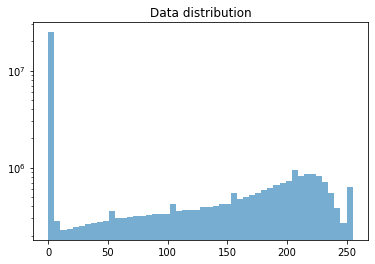

In [19]:
plt.title("Data distribution")
plt.hist(np.reshape(x_train, (60000*28*28)),log=True, bins=50, alpha=0.6)         #reshape(원하는 대상, 차원)
plt.show()

## 3. 데이터 전처리
  * 정규화
  * 원핫벡터


### **min max normalization**

# <center>$\frac{x-x_{min}}{x_{max}-x_{min}}$</center>

In [20]:
#x: np array

def minmax(x):
  x_min= np.min(x)
  x_max= np.max(x)
  return (x-x_min) / (x_max-x_min)

In [21]:
x_train_minmax = minmax(x_train)
x_test_minmax = minmax(x_test)
x_train_minmax.shape, x_test_minmax.shape

((60000, 28, 28), (10000, 28, 28))

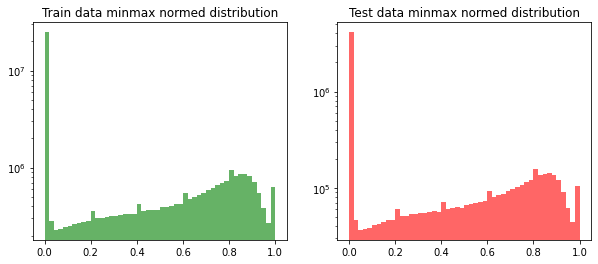

In [22]:
plt.figure(figsize=(10,4))                #전체 사이즈 조정
plt.subplot(1,2,1)
plt.title("Train data minmax normed distribution")
plt.hist(np.reshape(x_train_minmax, (60000*28*28)),log=True, bins=50, color='green', alpha=0.6)         #reshape(원하는 대상, 차원)

plt.subplot(1,2,2)
plt.title("Test data minmax normed distribution")
plt.hist(np.reshape(x_test_minmax, (10000*28*28)),log=True, bins=50, color='red',alpha=0.6)         #reshape(원하는 대상, 차원)

plt.show()

### **Z-Score Normalization**


# <center>$\frac{x-\bar{x}}{\sigma}$</center>

In [23]:
def z_score(x):
  x_mean= np.mean(x)
  x_std= np.std(x)

  return (x-x_mean) / x_std

In [24]:
x_train_z_score = z_score(x_train)
x_test_z_score = z_score(x_test)
x_train_z_score.shape, x_test_z_score.shape

((60000, 28, 28), (10000, 28, 28))

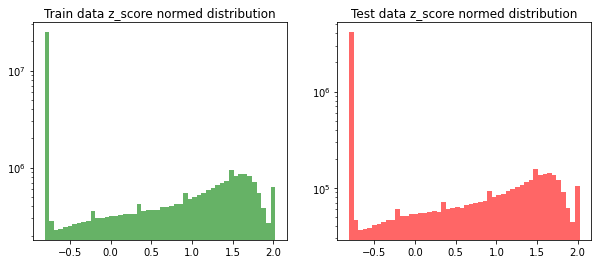

In [25]:
plt.figure(figsize=(10,4))                #전체 사이즈 조정
plt.subplot(1,2,1)
plt.title("Train data z_score normed distribution")
plt.hist(np.reshape(x_train_z_score, (60000*28*28)),log=True, bins=50, color='green', alpha=0.6)         #reshape(원하는 대상, 차원)

plt.subplot(1,2,2)
plt.title("Test data z_score normed distribution")
plt.hist(np.reshape(x_test_z_score, (10000*28*28)),log=True, bins=50, color='red',alpha=0.6)         #reshape(원하는 대상, 차원)

plt.show()

### **one-hot coding**

In [26]:
from tensorflow.keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)
print(y_train_onehot.shape)
print(y_test_onehot.shape)

(60000, 10)
(10000, 10)


# 모델
---

## 1. 모델구현
---

In [27]:
from tensorflow.keras import models, layers, optimizers

### **Softmax regression**

In [28]:
sr = models.Sequential(name='Softmax_regression')
sr.add(layers.Flatten(input_shape = [28,28]))
sr.add(layers.Dense(10, activation='softmax'))
sr.summary()

Model: "Softmax_regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### **DNN**

In [29]:
dnn = models.Sequential(name='DNN')
# input layer
dnn.add(layers.Flatten(input_shape = [28,28]))
# hidden layer
dnn.add(layers.Dense(100, activation='relu'))
dnn.add(layers.Dense(100, activation='relu'))
# output layer  (고정)
dnn.add(layers.Dense(10, activation='softmax'))
dnn.summary()

Model: "DNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### **CNN**

In [30]:
cnn = models.Sequential(name='CNN')
# x data :(28,28)->2차원
# dense : (764) -> 1차원
# convolution: (28,28,1) -> 3차원 (흑백이라 1, 컬러이면 3)

# input layer
cnn.add(layers.Reshape([28,28,1], input_shape = [28,28]))
# hidden layer
cnn.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))  # output의 차원 (숫자 10 (임의))
cnn.add(layers.MaxPool2D(pool_size=3))
cnn.add(layers.Conv2D(10, kernel_size = 5, activation='relu'))  
cnn.add(layers.MaxPool2D(pool_size=3))

cnn.add(layers.Flatten())

# output layer  (고정)
cnn.add(layers.Dense(10, activation='softmax'))
cnn.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 10)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 10)          2510      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 10)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110     

## 2. 학습
---

### **Softmax Regression**

In [31]:
sr.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])


Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8226 - acc: 0.7398
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5916 - acc: 0.8076
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5425 - acc: 0.8219
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5155 - acc: 0.8286
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4984 - acc: 0.8333
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4857 - acc: 0.8370
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4755 - acc: 0.8403
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4683 - acc: 0.8427
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4617 - acc: 0.8442
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4563 - acc: 0.8458
Epoch 11/20
1875/1875 [======

In [37]:
history_sr = sr.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4244 - acc: 0.8555
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4229 - acc: 0.8555
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4216 - acc: 0.8570
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4200 - acc: 0.8566
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4184 - acc: 0.8572
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4172 - acc: 0.8571
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4157 - acc: 0.8576
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4146 - acc: 0.8589
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4135 - acc: 0.8583
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4127 - acc: 0.8583
Epoch 11/20
1875/1875 [======

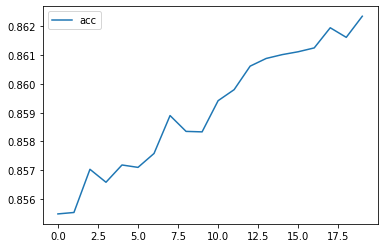

In [38]:
plt.plot(history_sr.history['acc'])
plt.legend(['acc'])

plt.show()

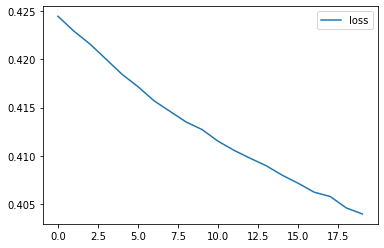

In [39]:
plt.plot(history_sr.history['loss'])
plt.legend(['loss'])

plt.show()

### **DNN**

In [32]:
dnn.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7395 - acc: 0.7524
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4975 - acc: 0.8276
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4512 - acc: 0.8425
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4233 - acc: 0.8508
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4032 - acc: 0.8585
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3870 - acc: 0.8646
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3749 - acc: 0.8672
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3636 - acc: 0.8723
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3534 - acc: 0.8742
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3448 - acc: 0.8778
Epoch 11/20
1875/1875 [======

In [40]:
history_dnn = dnn.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2793 - acc: 0.8977
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2756 - acc: 0.9010
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2714 - acc: 0.9013
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - acc: 0.9026
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - acc: 0.9044
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2608 - acc: 0.9050
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2573 - acc: 0.9066
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2540 - acc: 0.9083
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2501 - acc: 0.9102
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2480 - acc: 0.9104
Epoch 11/20
1875/1875 [======

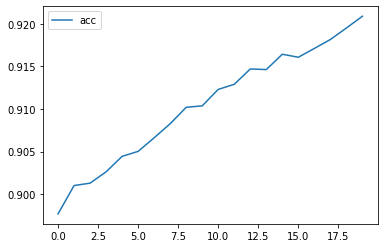

In [41]:
plt.plot(history_dnn.history['acc'])
plt.legend(['acc'])

plt.show()

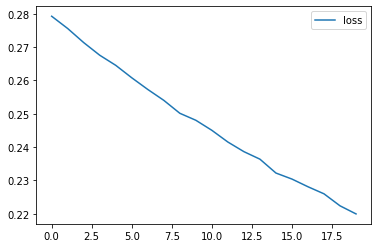

In [42]:
plt.plot(history_dnn.history['loss'])
plt.legend(['loss'])

plt.show()

### CNN

In [33]:
cnn.compile(optimizer=optimizers.SGD(learning_rate=0.01),
           loss= 'categorical_crossentropy',
           metrics=['acc'])


Epoch 1/20
1875/1875 [==============================] - 24s 13ms/step - loss: 1.1651 - acc: 0.5743
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.7322 - acc: 0.7286
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6512 - acc: 0.7586
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6158 - acc: 0.7716
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5920 - acc: 0.7801
Epoch 6/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5714 - acc: 0.7890
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5518 - acc: 0.7977
Epoch 8/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5334 - acc: 0.8051
Epoch 9/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5173 - acc: 0.8134
Epoch 10/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5008 - acc: 0.8198
Epoch 11/

In [43]:
history_cnn = cnn.fit(x_train_minmax, y_train_onehot, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4197 - acc: 0.8503
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4153 - acc: 0.8500
Epoch 3/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4118 - acc: 0.8526
Epoch 4/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4074 - acc: 0.8539
Epoch 5/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4050 - acc: 0.8547
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4012 - acc: 0.8552
Epoch 7/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3990 - acc: 0.8567
Epoch 8/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3952 - acc: 0.8580
Epoch 9/20
1875/1875 [==============================] - 23s 13ms/step - loss: 0.3928 - acc: 0.8590
Epoch 10/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3898 - acc: 0.8596
Epoch 11/

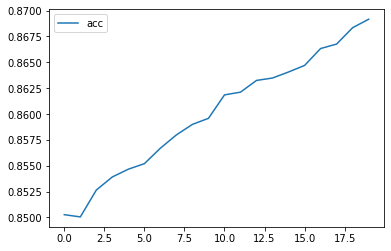

In [44]:
plt.plot(history_cnn.history['acc'])
plt.legend(['acc'])
plt.show()

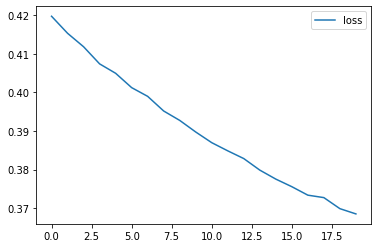

In [45]:
plt.plot(history_cnn.history['loss'])
plt.legend(['loss'])
plt.show()

## 3. 성능평가
---

### Softmax Regression

In [34]:
sr.evaluate(x_test_minmax, y_test_onehot)


313/313 [==============================] - 0s 1ms/step - loss: 0.4633 - acc: 0.8384


[0.4632754325866699, 0.8384000062942505]

### DNN

In [35]:
dnn.evaluate(x_test_minmax, y_test_onehot)


313/313 [==============================] - 1s 1ms/step - loss: 0.3484 - acc: 0.8757


[0.3483772873878479, 0.8756999969482422]

### CNN

In [36]:
cnn.evaluate(x_test_minmax, y_test_onehot)


313/313 [==============================] - 2s 6ms/step - loss: 0.4551 - acc: 0.8392


[0.455121248960495, 0.8392000198364258]